
### 1.1  Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

### 1.2 messages intuition
sms messages classification as spam or not spam using uci data set from our intuition about spam sms we usuallly know that they contain url about the offer or concerned website. SMS spam messages are usually bulk messages containing short a short description, url, an offer/deal which is targeting a large set of users so the messages are generally short;

In [3]:
#importing sms data set and undersatnding data
sms=pd.read_csv(r"C:\Users\SANTOSH A PATIL\Desktop\UDACITY COURE WORK\naive_bayes_tutorial-master\smsspamcollection\SMSSpamCollection.txt",sep='\t',header=None,names=['label','message'])
print(sms.head())
sms.describe()
sms.groupby('label').describe()


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### 1.3 priliminary examination of the sms
we can infer that there are 747 spam messages and  4825 not spam messages and some messages have repeated more than once



### 1.4 Dropping duplicate sms in both spam and not spam

In [4]:
sms.drop_duplicates(inplace=True)
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  No. Its not specialisation. Can work but its s...    1
spam      653    653  You are being contacted by our dating service ...    1

### 1.5 after dropping duplicate messages

the number of not spam messages dropped from 4825 to 4516 and and spam messages from 747 to 653

for further analysis from here we have more not spam messages than spam messages



### 1.6 To check if all messages have appropriate labels

It is necessary to check if all the 5169 messages have appropriate labels

In [5]:
countspam=0
countham=0
unlabelled=0
for x in sms['label']:
    if x=='spam': 
        countspam=countspam+1
    elif x=='ham':
        countham=countham+1
    else:
        unlabeled=unlabeled+1
print("Total number of spam messages",countspam)        
print("Total number of ham messages",countham)  
print("Total number of unlabelled messages",unlabelled)  

Total number of spam messages 653
Total number of ham messages 4516
Total number of unlabelled messages 0


### 1.7 Length of messages in both spam and not spam




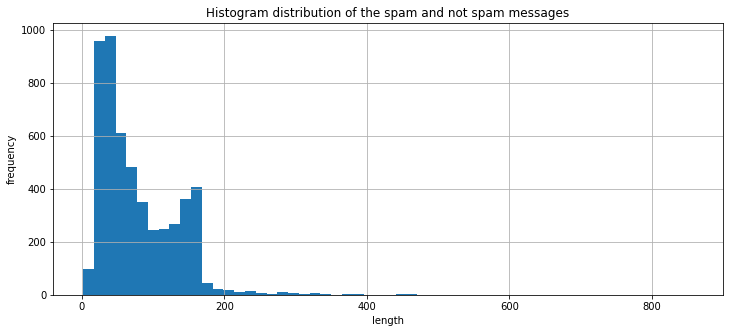

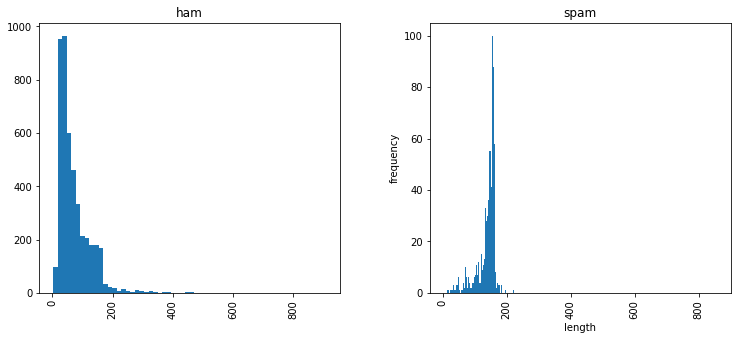

In [6]:
sms['length'] = sms['message'].apply(len)
sms.head();
plt.title('Histogram distribution of the spam and not spam messages')
sms['length'].hist(bins=60,figsize=(12,5))
plt.xlim(-40,900)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()



sms['length'].hist(by=sms['label'],bins=60,figsize=(12,5))
plt.xlim(-40,900);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

### 1.7.1 Inference from the length of sms
from the histogram distribution of both spam and not spam messages we can conclude that majority of the spam messages have a greater length. we can at this stage also conclude that if a message has a length greater than 150 we can infer that the sms will be a spam, but the accuracy of our ML model will be very less; hence for further analysis we should clean and preprocess the data;

### 1.8.1 Binarising labels has ham(not spam) as 0 and spam as 1

representing spam and not Spam(ham) as 1 and 0 makes it efficient for classifing messages

In [7]:
sms['labels'] = sms['label'].map({'ham': 0, 'spam': 1})
sms.head()

,label,message,length,labels
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


# 2.0 SMS Cleaning and Wrangling

by simply going through the sms we see that they contain a lot of puntations, words which hinder the learning capabilities of the ML;
hence it is necessary to clean the sms;
to clean the sms:
1. remove punctuation using python's string 
2. remove word like 'him', 'and' which do not add much meaning to the message using stop words from nltk
3. re


#### 2.1 Delete punctuations by using python string

In [8]:
# function to delete punctuations by python string 
print('List of supported punctuations',string.punctuation)
def delete_punctuation(msg):
    new_msg=''.join([p for p in msg if p not in string.punctuation])
    return new_msg
sms['del_p_message']=sms['message'].apply(delete_punctuation)

sms['del_p_length'] = sms['del_p_message'].apply(len)
sms.head()

List of supported punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,label,message,length,labels,del_p_message,del_p_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,Go until jurong point crazy Available only in ...,102
1,ham,Ok lar... Joking wif u oni...,29,0,Ok lar Joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,Free entry in 2 a wkly comp to win FA Cup fina...,149
3,ham,U dun say so early hor... U c already then say...,49,0,U dun say so early hor U c already then say,43
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,Nah I dont think he goes to usf he lives aroun...,59


### 2.1.1 Visulizing sms in terms of length before and after removing punctuations

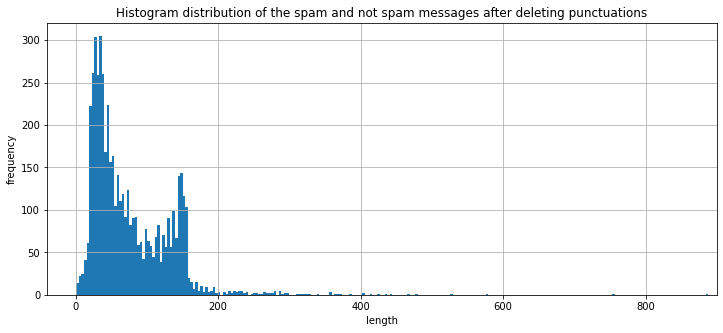

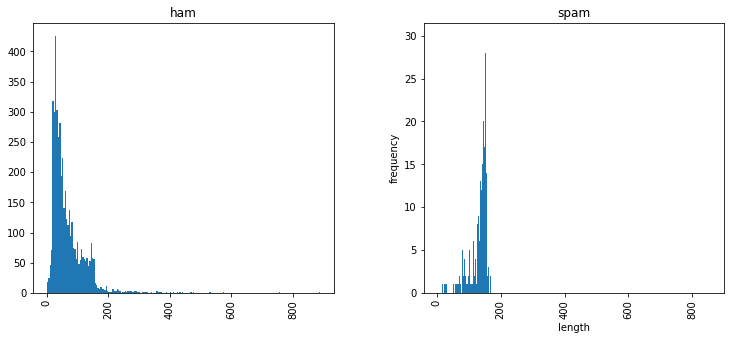

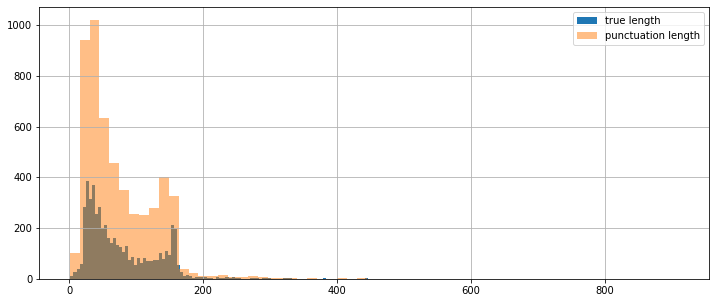

In [21]:
plt.title('Histogram distribution of the spam and not spam messages after deleting punctuations')
sms['del_p_length'].hist(bins=250,figsize=(12,5))
plt.xlim(-40,900)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


sms['del_p_length'].hist(by=sms['label'],bins=200,figsize=(12,5))
plt.xlim(-40,900);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

sms['length'].hist(bins=200,alpha=1,figsize=(12,5),label='true length')
sms['del_p_length'].hist(bins=60,alpha=0.5,figsize=(12,5),label='punctuation length')
plt.legend(loc='upper right')
plt.show()


### 2.2 Cleaning SMS by using STOP WORDS which are not informative enough to classify as spam or not spam

In [52]:
from nltk.corpus import stopwords
stopwords.words("english")

# definie function to delete stop words
def delete_stopwords(msgp):
    msg_no_stopwords=' '.join([x for x in msgp.split() if x.lower() not in stopwords.words("english")])
    
    return msg_no_stopwords

sms['del_SW_message']=sms['del_p_message'].apply(delete_stopwords)



In [53]:
sms['del_SW_length']=sms['del_SW_message'].apply(len)
sms['del_SW_message'].head()
sms.head()

,label,message,length,labels,del_p_message,del_p_length,del_SW_message,del_SW_length,stemmed_message,stemmed_message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,Go until jurong point crazy Available only in ...,102,Go jurong point crazy Available bugis n great ...,82,go jurong point crazi avail bugi n great world...,77
1,ham,Ok lar... Joking wif u oni...,29,0,Ok lar Joking wif u oni,23,Ok lar Joking wif u oni,23,ok lar joke wif u oni,22
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,Free entry 2 wkly comp win FA Cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkts 2...,133
3,ham,U dun say so early hor... U c already then say...,49,0,U dun say so early hor U c already then say,43,U dun say early hor U c already say,35,u dun say earli hor u c alreadi say,36
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,Nah I dont think he goes to usf he lives aroun...,59,Nah dont think goes usf lives around though,43,nah dont think goe usf live around though,42


## 2.2.1 SMS cleaning and wrangling Visulization and comparing histogram with Punctuation removed words



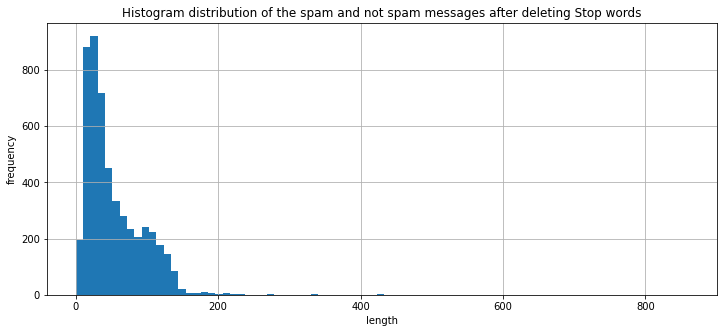

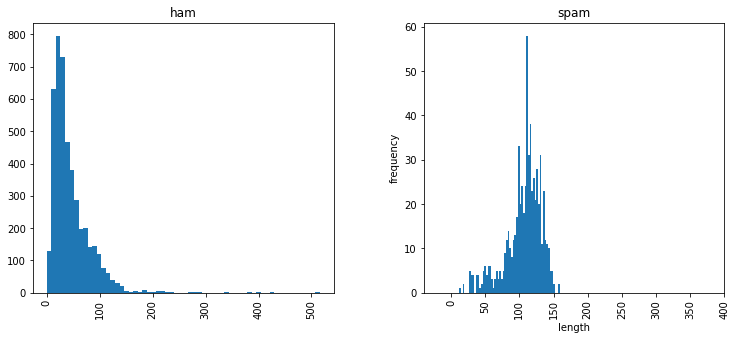

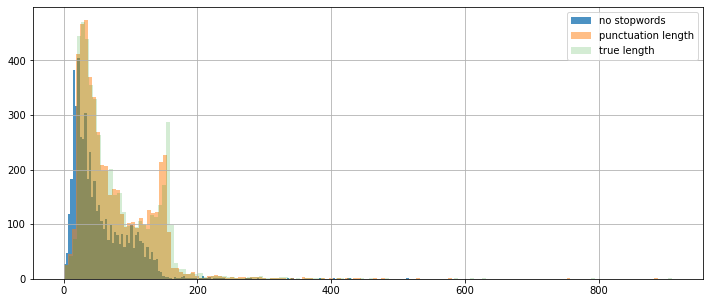

In [56]:
plt.title('Histogram distribution of the spam and not spam messages after deleting Stop words')
sms['del_SW_length'].hist(bins=50,figsize=(12,5))
plt.xlim(-40,900)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


sms['del_SW_length'].hist(by=sms['label'],bins=60,figsize=(12,5))
plt.xlim(-40,400);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

sms['del_SW_length'].hist(bins=150,alpha=0.8,figsize=(12,5),label='no stopwords')
sms['del_p_length'].hist(bins=150,alpha=0.5,figsize=(12,5),label='punctuation length')
sms['length'].hist(bins=150,alpha=0.2,figsize=(12,5),label='true length')
plt.legend(loc='upper right')
plt.show()


#### 2.3 SMS word visulization using wordcount

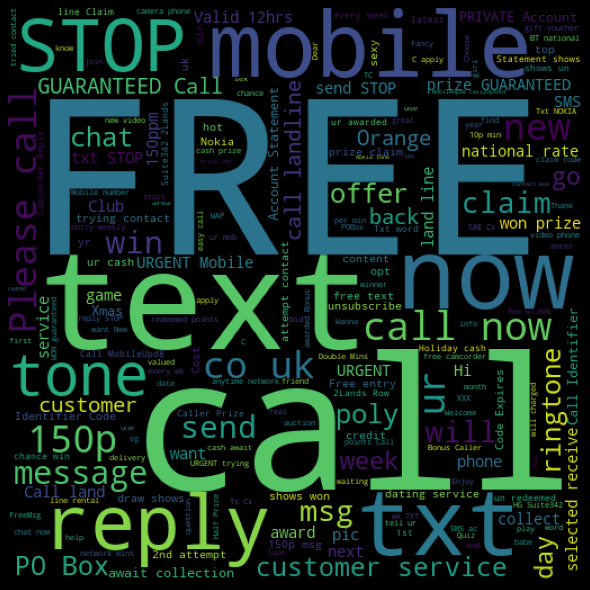

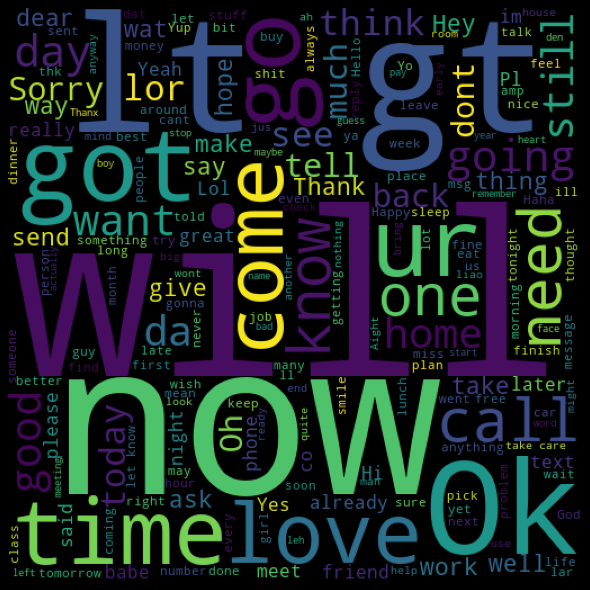

In [13]:
#pictorially represent spam and not spam words using WordCloud
from wordcloud import WordCloud
spam_words = ' '.join(list(sms[sms['labels'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

notspam_words = ' '.join(list(sms[sms['labels'] == 0]['message']))
notspam_wc = WordCloud(width = 512,height = 512).generate(notspam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(notspam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


### 2.4 Visulizing the most frequent words in spam and not spam messsages

It is import to know the words that make up the bulk of the text messages that distinguishes a message from spam and not spam, beacuse these words in spam are used my marketers to get our attention in a message and click the link or collect an offer


from collections import Counter
#creating a list of spam and not spam words

spam_elements=[]
ham_elements=[]
for x,y in zip(sms['del_SW_message'],sms['labels']):
    
    if y==1:
        spam_wordslist.append(x)
    elif y==0:
        ham_elements.append(x)



count_spam  = Counter(spam_wordslist)
count_ham = Counter(ham_wordslist)
spam_top50  = pd.DataFrame(count_spam.most_common(50),  columns=['word', 'count'])
ham_top50 = pd.DataFrame(count_ham.most_common(50), columns=['word', 'count'])


if y==1:
        spam_elements.append(x)
    elif y==0:
        ham_elements.append(x)
spam_wordslist = []
for q in spam_elements:
    for w in q:
        spam_wordslist.append(w)

ham_wordslist = []
for sublist in ham_elements:
    for item in sublist:
        ham_wordslist.append(item)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

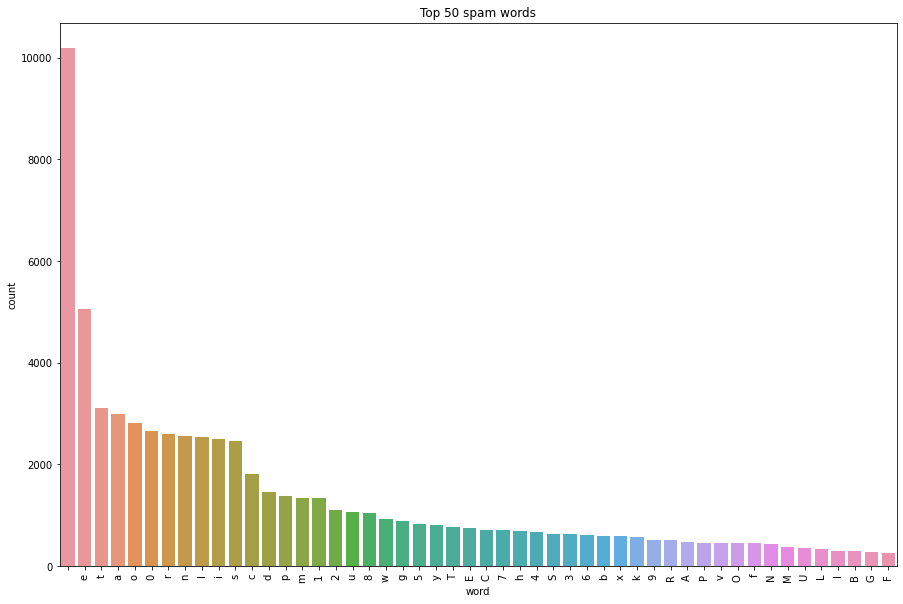

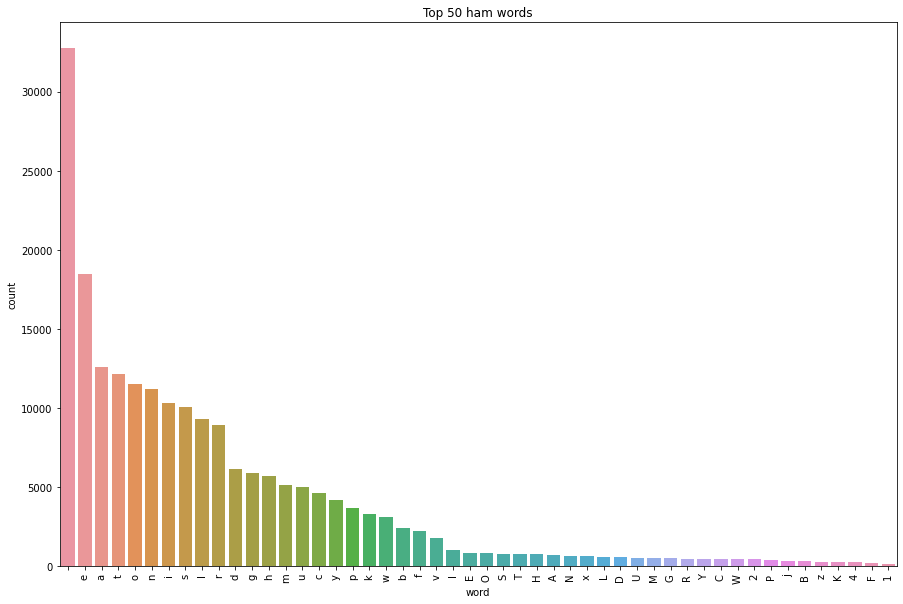

In [70]:
fig, axis = plt.subplots(figsize=(15, 10))
sns.barplot(x='word', y='count',data=spam_top50, ax=axis)
plt.title("Top 50 spam words")
plt.xticks(rotation='vertical')

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='word', y='count',data=ham_top50, ax=ax)
plt.title("Top 50 ham words")
plt.xticks(rotation='vertical')


#### 2.5 Stemming Words
Stemming is the process of giving a similar meaning to the words in a given sentence;
word like programming, programmed, programmer, program can be collectively called program

from nltk.stem import SnowballStemmer 
stemmer= SnowballStemmer("english")
def stemming(msg):
    stemmed_sentence =' '.join([x for x in msg in stemmer.stem(x)])
    return stemmed_sentence

In [104]:
from nltk.stem import SnowballStemmer 
stemmer= SnowballStemmer("english")
def stemming(text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words =words + (stemmer.stem(i))+" "
    return words

In [109]:
sms['stemmed_message']=sms['del_SW_message'].apply(stemming)
sms['stem_message_length']= sms['stemmed_message'].apply(len)


In [111]:
sms.head()

,label,message,length,labels,del_p_message,del_p_length,del_SW_message,del_SW_length,stemmed_message,stemmed_message_length,stem_message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,Go until jurong point crazy Available only in ...,102,Go jurong point crazy Available bugis n great ...,82,go jurong point crazi avail bugi n great world...,77,77
1,ham,Ok lar... Joking wif u oni...,29,0,Ok lar Joking wif u oni,23,Ok lar Joking wif u oni,23,ok lar joke wif u oni,22,22
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,Free entry 2 wkly comp win FA Cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkts 2...,133,133
3,ham,U dun say so early hor... U c already then say...,49,0,U dun say so early hor U c already then say,43,U dun say early hor U c already say,35,u dun say earli hor u c alreadi say,36,36
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,Nah I dont think he goes to usf he lives aroun...,59,Nah dont think goes usf lives around though,43,nah dont think goe usf live around though,42,42


#### 2.5.1 Visulization of message length after removing stem words with histogram 

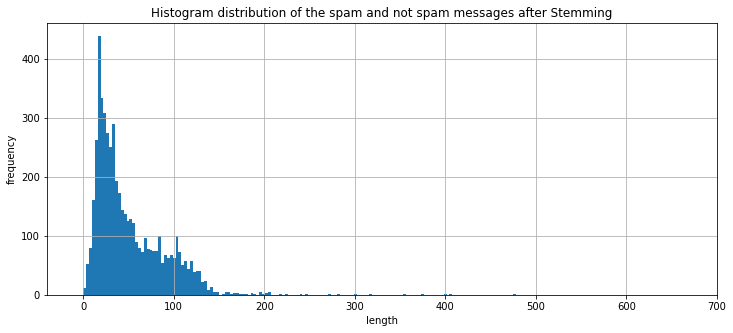

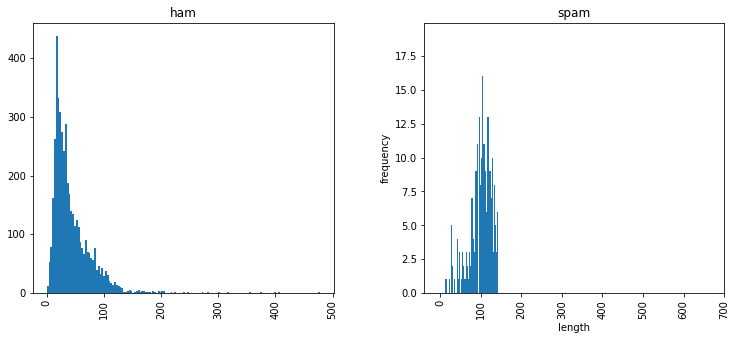

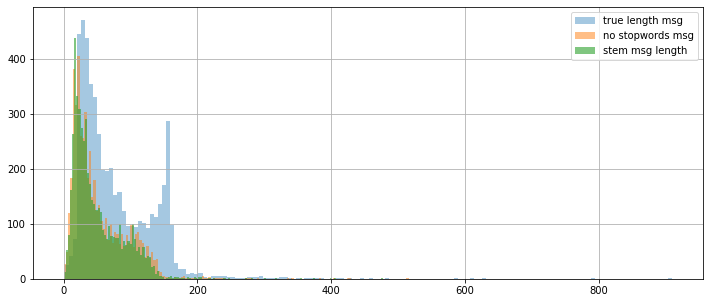

In [118]:
plt.title('Histogram distribution of the spam and not spam messages after Stemming')
sms['stem_message_length'].hist(bins=150,figsize=(12,5))
plt.xlim(-40,700)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


sms['stem_message_length'].hist(by=sms['label'],bins=150,figsize=(12,5))
plt.xlim(-40,700);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


sms['length'].hist(bins=150,alpha=0.4,figsize=(12,5),label='true length msg')
sms['del_SW_length'].hist(bins=150,alpha=0.5,figsize=(12,5),label='no stopwords msg')
sms['stem_message_length'].hist(bins=150,alpha=0.6,figsize=(12,5),label='stem msg length')
plt.legend(loc='upper right')
plt.show()

#### 2.6 Tokenizing and Vectorizing words
Tokenizing is a process of giving a unique id to each word our data set;
it is easier to implement to implement machine learning models on numerical values which map a particular word
after Tokenizing the occurence of each word in our data set is calculted
certain words repeat a number of times and do not add much value to our dataset hence they have to dealt with by normalizing and weighing them


In [122]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_v=count_vector.fit_transform(sms['stemmed_message'])


#### 2.6.1 Term frequency inverse document frequency - TFIDF

In [125]:
from sklearn.feature_extraction.text import TfidfTransformer

sms_tfidf = TfidfTransformer().fit(count_v)

#### 3.0 Splitting the words into training set and test test



In [126]:
#splitting data into training and test data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(sms_tfidf,sms['labels'], random_state=1)
print('Training messages size',xtrain.shape[0])
print('Testing messages size',xtest.shape[0])

TypeError: Singleton array array(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
      dtype=object) cannot be considered a valid collection.

In [ ]:
#splitting data into training and test data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(sms['del_SW_message'],sms['labels'], random_state=1)
print('Training messages size',xtrain.shape[0])
print('Testing messages size',xtest.shape[0])

### 2.5 Create Bag of Words using Count vectorizer
